# SeoulBike Rental Prediction

## Importing Required Libraries

In [1]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## Reading CSV data file

In [2]:
dataset = pd.read_csv("SeoulBikeData.csv")

In [3]:
dataset

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
dataset.info()

# There are no null values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Encoding Categorical Columns

In [6]:
label_encoder = LabelEncoder()

dataset['Seasons'] = label_encoder.fit_transform(dataset['Seasons'])
dataset['Holiday'] = label_encoder.fit_transform(dataset['Holiday'])
dataset['Functioning Day'] = label_encoder.fit_transform(dataset['Functioning Day'])

## Grouping Data on Per Day Basis

In [7]:
# Present data in file is on hourly basis. But, we need to predict on daily basis. Therefore, grouping the rows on the basis of date.

dataset_per_day = dataset.groupby("Date").agg({'Rented Bike Count':sum, 'Temperature(�C)':'mean', 'Humidity(%)': 'mean', 'Wind speed (m/s)': 'mean',
                                                 'Visibility (10m)': 'mean', 'Dew point temperature(�C)': 'mean', 'Solar Radiation (MJ/m2)': 'mean',
                                                 'Rainfall(mm)': 'mean', 'Snowfall (cm)': 'mean', 'Seasons' : 'mean', 'Holiday': 'mean',
                                                 'Functioning Day': 'mean'})

In [8]:
# Resetting index
dataset_per_day = dataset_per_day.reset_index()

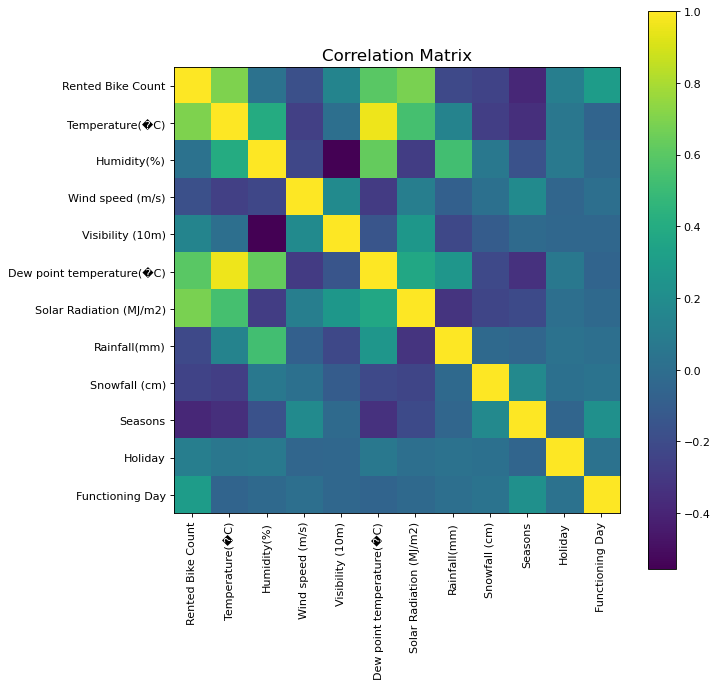

In [9]:
# Visualizing correlation between the variables.

corr = dataset_per_day.corr()
plt.figure(num=None, figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

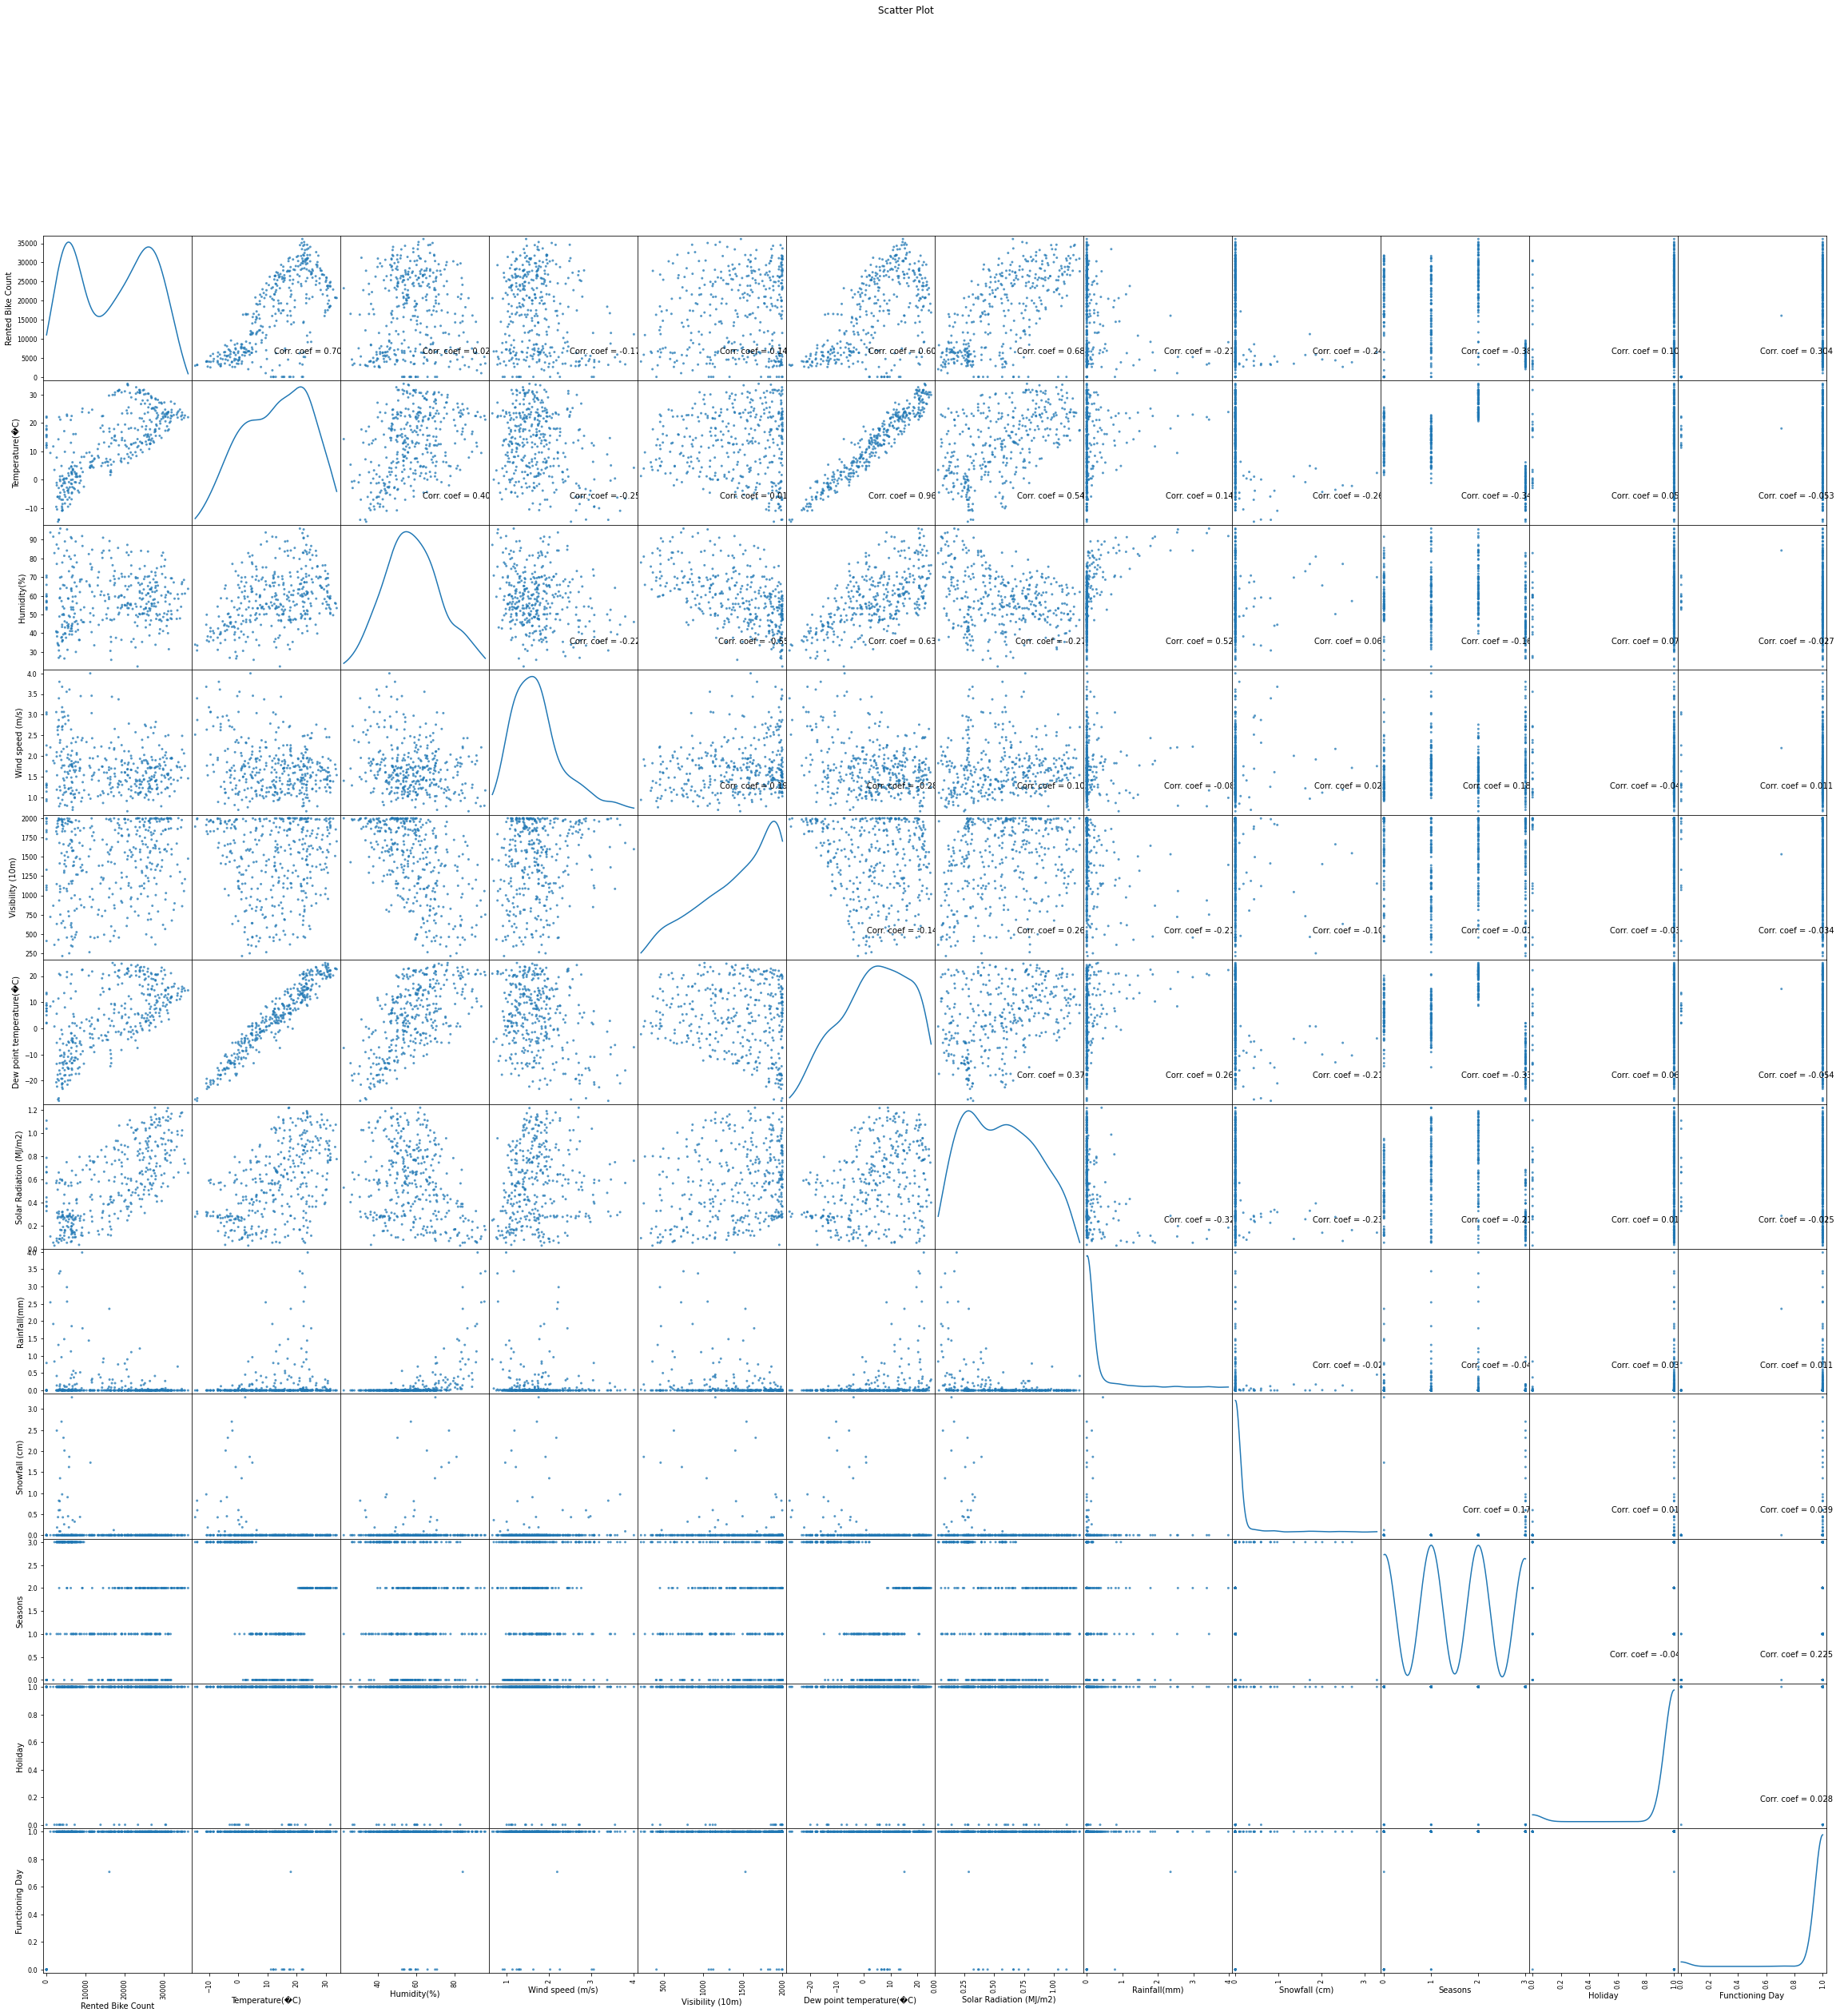

In [10]:
# scatter plot

ax = pd.plotting.scatter_matrix(dataset_per_day, alpha=0.75, figsize=[40, 40], diagonal='kde')
corrs = dataset_per_day.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=10)
plt.suptitle('Scatter Plot')
plt.show()

## Coverting Date Column to 'year', 'month' and 'day'

In [11]:
dataset_per_day['Date'] = pd.to_datetime(dataset_per_day['Date'])   # As 'Date' column is in string format. Coverting it to datetime.
dataset_per_day['year']= dataset_per_day['Date'].dt.year            # Extracting year.
dataset_per_day['month']= dataset_per_day['Date'].dt.month          # Extracting month number.
dataset_per_day['day']= dataset_per_day['Date'].dt.day              # Extracting day of the month.

dataset_per_day = dataset_per_day.drop(['Date'], axis = 1)          # Dropping 'Date' column.

## Checking Multicollinearity using VIF (Variable Inflation Factors)

In [12]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [13]:
X = dataset_per_day.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Rented Bike Count,22.022544
1,Temperature(�C),788.901036
2,Humidity(%),835.921703
3,Wind speed (m/s),12.121780
4,Visibility (10m),17.892650
5,Dew point temperature(�C),540.404746
6,Solar Radiation (MJ/m2),16.033595
7,Rainfall(mm),2.040513
8,Snowfall (cm),1.227571
9,Seasons,4.624318


In [15]:
# Dropping 'Temperature(°C)' and 'year' as they have large VIF

dataset_per_day = dataset_per_day.drop(['Temperature(�C)', 'year'], axis = 1)

In [16]:
dataset_per_day

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day
0,4290,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000,3,0,1.0,1,1
1,5377,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167,3,1,1.0,1,2
2,5132,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000,1,0,1.0,1,3
3,17388,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000,1,1,1.0,1,4
4,26820,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000,1,0,1.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,31681,61.208333,1.941667,1246.208333,11.491667,1.122500,0.000000,0.000000,1,1,1.0,5,31
361,22897,49.625000,1.383333,1993.791667,20.216667,1.020833,0.000000,0.000000,2,1,1.0,7,31
362,27817,67.166667,1.600000,1609.000000,18.491667,0.923750,0.004167,0.000000,2,1,1.0,8,31
363,21545,55.000000,1.666667,1960.916667,-1.408333,0.604583,0.000000,0.000000,0,1,1.0,10,31


## Defining Predictor and Target Variable

In [17]:
target = "Rented Bike Count"

X = dataset_per_day.drop(columns=target)
y = dataset_per_day[target]

## Splitting the Dataset in Train and Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Applying Ordinary Least Squares(OLS) Method

In [19]:
## Applying OLS method from statsmodel.api to get matrices like 'R-squared', 'Adj. R-squared', 'p-value' etc.

X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           4.17e-95
Time:                        00:07:18   Log-Likelihood:                -2860.2
No. Observations:                 292   AIC:                             5746.
Df Residuals:                     279   BIC:                             5794.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Defining Linear Regression and Fitting the Data

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## Predictions(Linear Regression)

In [21]:
y_pred_test_lr = lr_model.predict(X_test)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_test, y_pred_test_lr))
print('MSE:', mean_squared_error(y_test, y_pred_test_lr))
print('R2:', r2_score(y_test, y_pred_test_lr))

Linear Regression - Training Metrics
MAE: 3050.684318724326
MSE: 15269011.068434646
R2: 0.8654084688632953


## Defining Random Forest Regressor and Fitting the Data

In [22]:
rf_regressor = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

## Predictions(Random Forest Regressor)

In [23]:
y_pred_test_rf = rf_regressor.predict(X_test)
print('Random Forest - Training Metrics')
print('MAE:', mean_absolute_error(y_test, y_pred_test_rf))
print('MSE:', mean_squared_error(y_test, y_pred_test_rf))
print('R2:', r2_score(y_test, y_pred_test_rf))

Random Forest - Training Metrics
MAE: 2630.8638356164383
MSE: 11256160.220290411
R2: 0.9007804872248175
